# Prediction of Train Ticket Prices in Spain using Supervised Machine Learning

This is a tickets pricing monitoring system. It scrapes tickets pricing data periodically and stores it in a database. Ticket pricing changes based on demand and time, and there can be significant difference in price. We are creating this product mainly with ourselves in mind. Users can set up alarms using an email, choosing an origin and destination (cities), time (date and hour range picker) choosing a price reduction over mean price, etc.

**Following is the description for columns in the dataset**<br>
- insert_date: date and time when the price was collected and written in the database<br>
- origin: origin city <br>
- destination: destination city <br>
- start_date: train departure time<br>
- end_date: train arrival time<br>
- train_type: train service name<br>
- price: price<br>
- train_class: ticket class, tourist, business, etc.<br>
- fare: ticket fare, round trip, etc <br>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

In [2]:
import warnings
warnings.simplefilter('ignore')

Let's get the data into the dataframe.

In [3]:
data = pd.read_csv('data1.csv')
df = data.copy()

In [4]:
df.head()

,Unnamed: 0,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,702,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,703,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,704,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,705,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,706,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


# Data Wrangling

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
0,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible
1,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +
2,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +
3,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +
4,2019-04-19 05:37:35,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo


In [6]:
print('Rows:   ', df.shape[0])
print('Columns:', df.shape[1])

Rows:    215909
Columns: 9


In [7]:
df.dtypes

insert_date     object
origin          object
destination     object
start_date      object
end_date        object
train_type      object
price          float64
train_class     object
fare            object
dtype: object

In [8]:
df.describe()

,price
count,202321.000000
mean,56.723877
std,25.531787
min,16.600000
25%,28.350000
50%,53.400000
75%,76.300000
max,206.800000


In [9]:
df.describe(include='all')

,insert_date,origin,destination,start_date,end_date,train_type,price,train_class,fare
count,215909,215909,215909,215909,215909,215909,202321.000000,215266,215266
unique,30543,5,5,2231,2870,16,NaN,5,5
top,2019-05-09 15:02:02,MADRID,MADRID,2019-06-02 17:30:00,2019-06-02 23:03:00,AVE,NaN,Turista,Promo
freq,90,110440,105469,2089,1278,126577,NaN,164016,132065
mean,NaN,NaN,NaN,NaN,NaN,NaN,56.723877,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,25.531787,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,16.600000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,28.350000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,53.400000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,76.300000,NaN,NaN


**Insights from Summary Statistics above**

**insert_date**:<br>Well, it doesn't really tell much. But the date when most people paid for ticket price is '2019-05-09 15:02:02', A total of 90 people did that.<br><br>
**origin**:<br>There are total of 5 origin train stations. And most people (105469 number of people) boarded from Madrid.<br><br>
**destination**:<br>Same as above. Most people (a total of 105469 people) landed on Madrid stations.<br><br>
**start_date and end_date**:<br>Most tickets are starting and expiring at '2019-06-02'. Although this frequency seems not to matter much.<br><br>
**train_type**:<br>There are 16 types of train. The type 'AVE' is the most boarded train: out of 215909, 126577 people boarded from this type. Perhaps, price wise, 'AVE' type is the most affordable option for people. We'll see later.<br><br>
**price**:<br>'price' is the only numerical variable we have here. By looking at its mean (56.723877) & median (53.400000), we can see that the price data tends to be symmetrical. Although, the min price is 16.600000 and max price is 206.800000. This shows that price range is quite big which shows that this data might need scaling afterwards.<br><br>
**train_class**:<br>There are a total of 5 train classes. 'Turista' is the most used train class. Perhaps because Turista is an affordable option for people price wise. We'll see about that later. <br><br>
**fare**:<br> There are 5 types of fare, out of which, promo is the most opted for option. Might be because its the most affordable. We'll see.

In [10]:
df.isnull().sum()

insert_date        0
origin             0
destination        0
start_date         0
end_date           0
train_type         0
price          13588
train_class      643
fare             643
dtype: int64

In [11]:
df.price.fillna(value=df.price.mean(), inplace=True)
df.isnull().sum()

insert_date      0
origin           0
destination      0
start_date       0
end_date         0
train_type       0
price            0
train_class    643
fare           643
dtype: int64

In [12]:
df.dropna(subset=['train_class'], inplace=True)

In [13]:
df.drop(inplace=True, axis=1, labels='insert_date')

In [14]:
df.isnull().sum()

origin         0
destination    0
start_date     0
end_date       0
train_type     0
price          0
train_class    0
fare           0
dtype: int64

Null values are handled.

# Exploratory Data Analysis

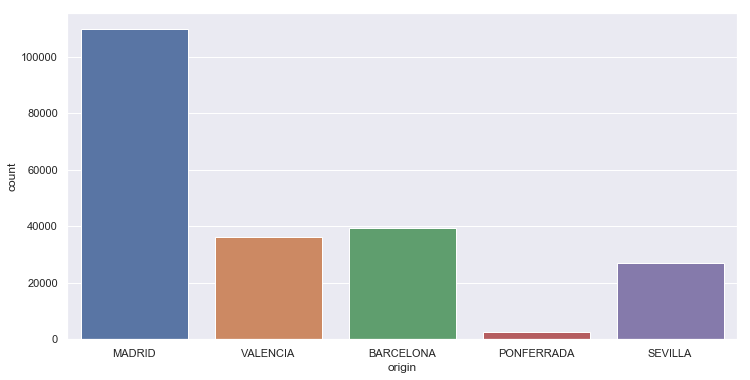

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='origin', order=[
              'MADRID', 'VALENCIA', 'BARCELONA', 'PONFERRADA', 'SEVILLA'])

**Insights:** According to the data, most people board from MADRID station. And the least number of people board from PONFERRADA station. Other people board from VALENCIA, BARCELONA, and SEVILLA with their count ranging between 26000 and 40000 approx.

Now, for destinations:

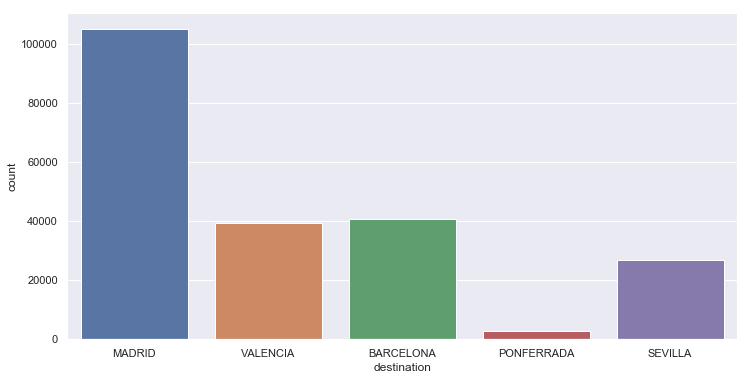

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='destination', order=[
              'MADRID', 'VALENCIA', 'BARCELONA', 'PONFERRADA', 'SEVILLA'])

**Insights:** The insights are very similar to that of origin. Perhaps, same people travel back to their origin, that's why destination is the same when the same count of people travel back.

**Let's look at the different types of train that run in Spain according to the dataset.**

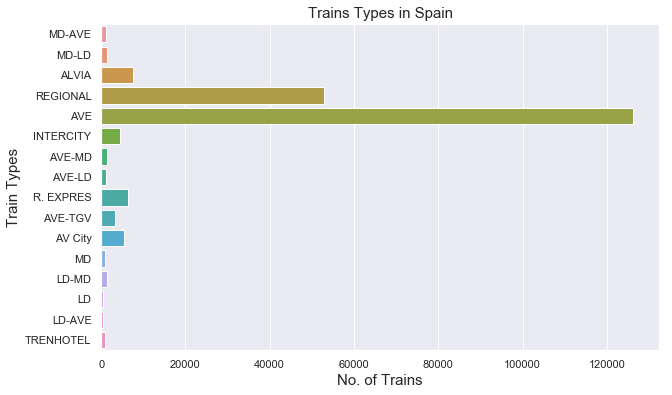

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df.train_type)
plt.xlabel('No. of Trains', {'fontsize': 15})
plt.ylabel('Train Types', {'fontsize': 15})
plt.title('Trains Types in Spain', {'fontsize': 15})

plt.show()

**Insights:** Train type of 'AVE' is the most number of trains in Spain, followed by type 'Regional'.

**Let's look at the different classes of train.**

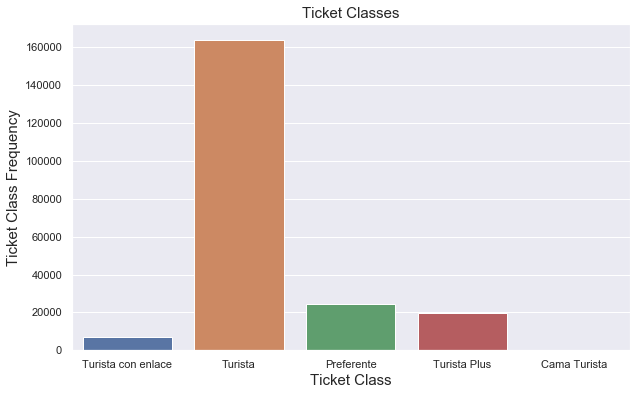

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df.train_class)
plt.xlabel('Ticket Class', fontsize=15)
plt.ylabel('Ticket Class Frequency', fontsize=15)
plt.title('Ticket Classes', fontsize=15)

plt.show()

**Insights:** Ticket class of 'Turista' is the most used ticked class in trains. The reason might be that this is affordable option.

**Let's look at the number of tickets bought from each category of fare**


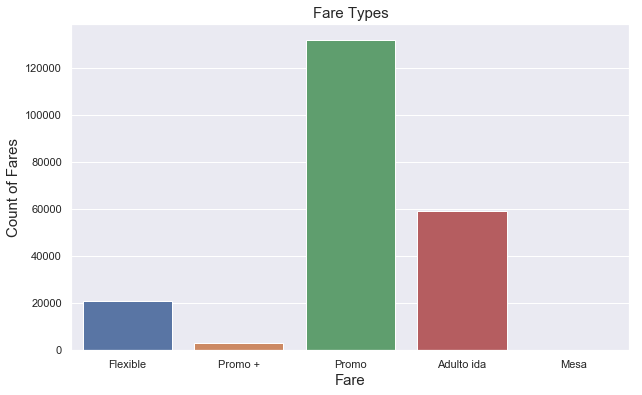

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df.fare)
plt.xlabel('Fare', fontsize=15)
plt.ylabel('Count of Fares', fontsize=15)
plt.title('Fare Types', fontsize=15)

plt.show()

**Insights:** 'Promo', followed by 'Aduilto ida' are the types of fares most opted for by the customers.

**Let's look at the distribution of the ticket prices.**

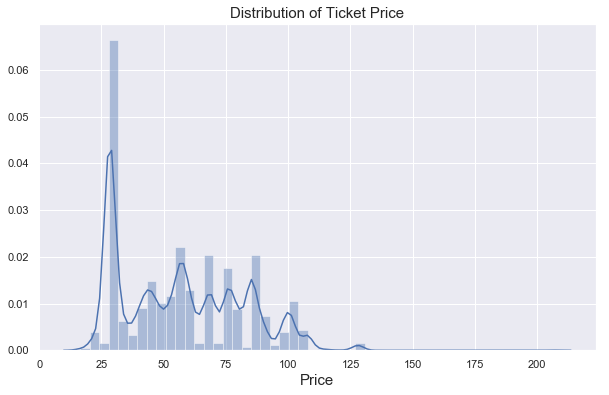

In [20]:
plt.figure(figsize=(10, 6))
sns.distplot(a=df['price'])
plt.xlabel('Price', fontsize=15)
plt.title('Distribution of Ticket Price', fontsize=15)

plt.show()

**Insights:** When we looked at the summary stats, the price seemed symmetrical. But looking here. It seems that the data is right skewed.

## Descriptive Analytics

Let's look at different independant variables and try to infer different insights.

**train_class vs price**

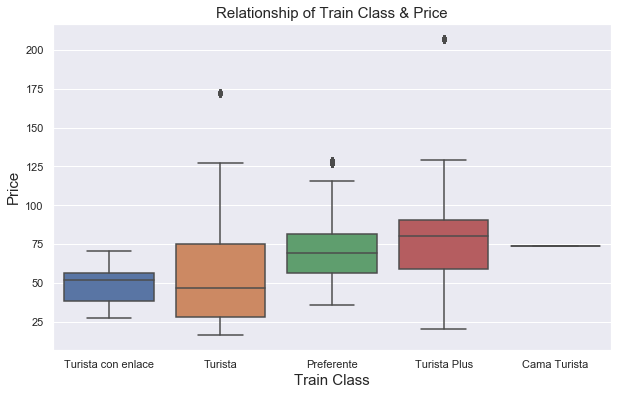

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='train_class', y='price', data=df)
plt.title('Relationship of Train Class & Price', fontsize=15)
plt.xlabel('Train Class', fontsize=15)
plt.ylabel('Price', fontsize=15)

plt.show()

**Insights:** Well, no particular trend since box plots are kind of overlapping each other. But looking at the box plots, we can see that 'Turista' and 'Turista Plus' happen to cost more in some cases.

**train_type vs price**

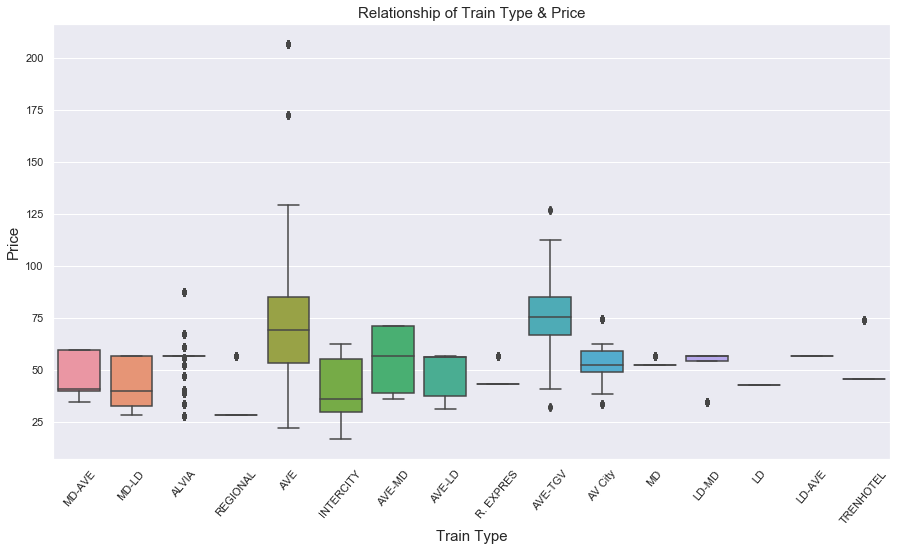

In [22]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='train_type', y='price', data=df)
plt.xticks(rotation=50)
plt.xlabel('Train Type', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Relationship of Train Type & Price', fontsize=15)

plt.show()

**Insights:** 'AVE' and 'AVE-TGV' types cost more price than other ticket types.

## Feature Engineering


In [23]:
df = df.reset_index()

**Finding the travel time between the place of origin and destination**<br>
We need to find out the travel time for each entry which can be obtained from the 'start_date' and 'end_date' column. Also if you see, these columns are in object type therefore datetimeFormat should be defined to perform the necessary operation of getting the required time.

**Import datetime library**

In [24]:
import datetime

In [25]:
datetimeFormat = '%Y-%m-%d %H:%M:%S'


def fun(a, b):
    diff = datetime.datetime.strptime(b, datetimeFormat) - datetime.datetime.strptime(a, datetimeFormat)
    return(diff.seconds/3600.0)

In [26]:
df['travel_time_in_hrs'] = df.apply(
    lambda x: fun(x['start_date'], x['end_date']), axis=1)

Let's introduce a new feature. 'from_to'

In [27]:
# Checking unique combinations of origin and destination
set(zip(df['origin'], df['destination']))

{('BARCELONA', 'MADRID'),
 ('MADRID', 'BARCELONA'),
 ('MADRID', 'PONFERRADA'),
 ('MADRID', 'SEVILLA'),
 ('MADRID', 'VALENCIA'),
 ('PONFERRADA', 'MADRID'),
 ('SEVILLA', 'MADRID'),
 ('VALENCIA', 'MADRID')}

Now, let's make a new feature.

In [28]:
df['from_to'] = None  # initializing a new feature

df.loc[(df['origin'] == 'BARCELONA') & (df['destination'] == 'MADRID'), ['from_to']] = 'barc to madrid'
df.loc[(df['origin'] == 'MADRID') & (df['destination'] == 'BARCELONA'), ['from_to']] = 'madrid to barc'
df.loc[(df['origin'] == 'MADRID') & (df['destination'] == 'PONFERRADA'), ['from_to']] = 'madrid to ponf'
df.loc[(df['origin'] == 'MADRID') & (df['destination'] == 'SEVILLA'), ['from_to']] = 'madrid to sev'
df.loc[(df['origin'] == 'MADRID') & (df['destination'] == 'VALENCIA'), ['from_to']] = 'madrid to val'
df.loc[(df['origin'] == 'PONFERRADA') & (df['destination'] == 'MADRID'), ['from_to']] = 'ponf to madrid'
df.loc[(df['origin'] == 'SEVILLA') & (df['destination'] == 'MADRID'), ['from_to']]= 'sev to madrid'
df.loc[(df['origin'] == 'VALENCIA') & (df['destination'] == 'MADRID'), ['from_to']] = 'val to madrid'

df.head(20)

,index,origin,destination,start_date,end_date,train_type,price,train_class,fare,travel_time_in_hrs,from_to
0,0,PONFERRADA,MADRID,2019-06-02 15:00:00,2019-06-02 19:42:00,MD-AVE,59.50,Turista con enlace,Flexible,4.700000,ponf to madrid
1,1,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:03:00,MD-AVE,34.65,Turista con enlace,Promo +,5.800000,ponf to madrid
2,2,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 23:10:00,MD-LD,39.95,Turista con enlace,Promo +,5.916667,ponf to madrid
3,3,PONFERRADA,MADRID,2019-06-02 17:15:00,2019-06-02 22:14:00,MD-AVE,40.60,Turista con enlace,Promo +,4.983333,ponf to madrid
4,4,PONFERRADA,MADRID,2019-06-02 18:55:00,2019-06-02 23:03:00,ALVIA,27.90,Turista,Promo,4.133333,ponf to madrid
5,5,MADRID,VALENCIA,2019-06-17 06:08:00,2019-06-17 12:55:00,REGIONAL,28.35,Turista,Adulto ida,6.783333,madrid to val
6,6,MADRID,VALENCIA,2019-06-17 12:21:00,2019-06-17 19:04:00,REGIONAL,28.35,Turista,Adulto ida,6.716667,madrid to val
7,7,MADRID,VALENCIA,2019-06-17 16:05:00,2019-06-17 22:47:00,REGIONAL,28.35,Turista,Adulto ida,6.700000,madrid to val
8,8,MADRID,VALENCIA,2019-06-16 06:20:00,2019-06-16 12:55:00,REGIONAL,28.35,Turista,Adulto ida,6.583333,madrid to val
9,9,MADRID,VALENCIA,2019-06-16 12:42:00,2019-06-16 19:04:00,REGIONAL,28.35,Turista,Adulto ida,6.366667,madrid to val


In [29]:
list(df.from_to.unique())

['ponf to madrid',
 'madrid to val',
 'madrid to barc',
 'sev to madrid',
 'madrid to ponf',
 'val to madrid',
 'barc to madrid',
 'madrid to sev']

**Remove redundant features**


In [30]:
df.drop(labels=['start_date', 'end_date'], axis=1, inplace=True)

In [31]:
df.head()

,index,origin,destination,train_type,price,train_class,fare,travel_time_in_hrs,from_to
0,0,PONFERRADA,MADRID,MD-AVE,59.50,Turista con enlace,Flexible,4.700000,ponf to madrid
1,1,PONFERRADA,MADRID,MD-AVE,34.65,Turista con enlace,Promo +,5.800000,ponf to madrid
2,2,PONFERRADA,MADRID,MD-LD,39.95,Turista con enlace,Promo +,5.916667,ponf to madrid
3,3,PONFERRADA,MADRID,MD-AVE,40.60,Turista con enlace,Promo +,4.983333,ponf to madrid
4,4,PONFERRADA,MADRID,ALVIA,27.90,Turista,Promo,4.133333,ponf to madrid


Removing redundant origin and destination

In [32]:
df.drop(labels=['origin', 'destination'], axis=1, inplace=True)
df.head()

,index,train_type,price,train_class,fare,travel_time_in_hrs,from_to
0,0,MD-AVE,59.50,Turista con enlace,Flexible,4.700000,ponf to madrid
1,1,MD-AVE,34.65,Turista con enlace,Promo +,5.800000,ponf to madrid
2,2,MD-LD,39.95,Turista con enlace,Promo +,5.916667,ponf to madrid
3,3,MD-AVE,40.60,Turista con enlace,Promo +,4.983333,ponf to madrid
4,4,ALVIA,27.90,Turista,Promo,4.133333,ponf to madrid


Removing 'index' label.

In [33]:
df.drop(labels='index', axis=1, inplace=True)
df.head()

,train_type,price,train_class,fare,travel_time_in_hrs,from_to
0,MD-AVE,59.50,Turista con enlace,Flexible,4.700000,ponf to madrid
1,MD-AVE,34.65,Turista con enlace,Promo +,5.800000,ponf to madrid
2,MD-LD,39.95,Turista con enlace,Promo +,5.916667,ponf to madrid
3,MD-AVE,40.60,Turista con enlace,Promo +,4.983333,ponf to madrid
4,ALVIA,27.90,Turista,Promo,4.133333,ponf to madrid


We now need to find out the pricing from 'MADRID' to other destinations. We also need to find out time which each train requires for travelling. 

## Travelling from MADRID to SEVILLA

**People travelling from MADRID to SEVILLA**

In [34]:
df1 = df[df['from_to'] == 'madrid to sev']

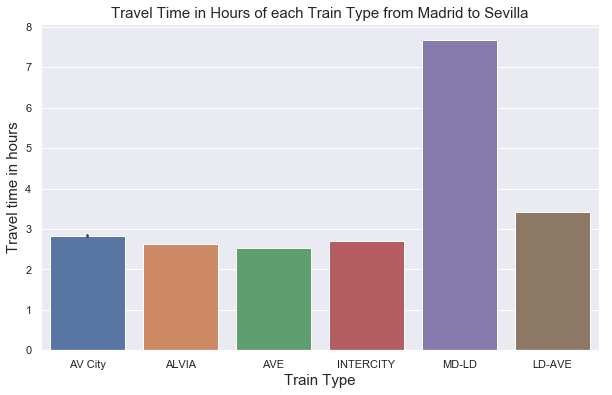

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(x='train_type', y='travel_time_in_hrs', data=df1)
plt.xlabel('Train Type', fontsize=15)
plt.ylabel('Travel time in hours', fontsize=15)
plt.title('Travel Time in Hours of each Train Type from Madrid to Sevilla', fontsize=15)

plt.show()

**Insights:** MD-LD type has the highest travel time in hours going from Madrid to Sevilla.

**train_type vs price**

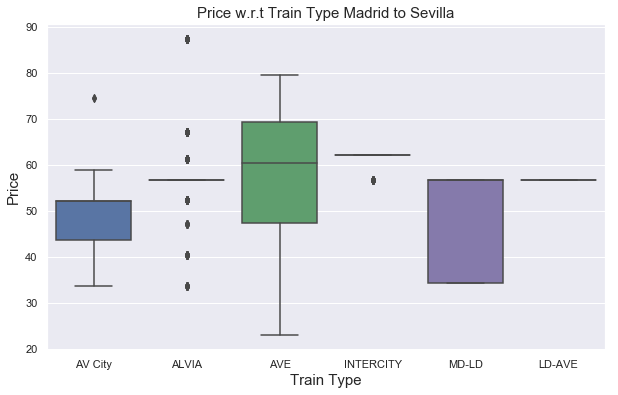

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='train_type', y='price', data=df1)
plt.title('Price w.r.t Train Type Madrid to Sevilla', fontsize=15)
plt.xlabel('Train Type', fontsize=15)
plt.ylabel('Price', fontsize=15)

plt.show()

## Travelling from MADRID to BARCELONA


In [37]:
df1 = df[df['from_to'] == 'madrid to barc']

**Travelling hours for each train type**

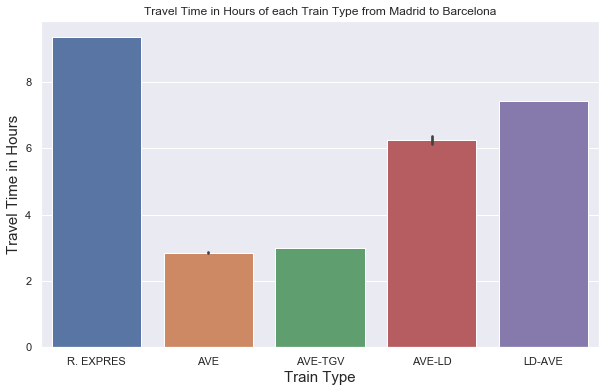

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='train_type', y='travel_time_in_hrs', data=df1)
plt.title('Travel Time in Hours of each Train Type from Madrid to Barcelona')
plt.xlabel('Train Type', fontsize=15)
plt.ylabel('Travel Time in Hours', fontsize=15)

plt.show()

**Insights**: Looking at the route of Madrid to Barcelona, R Expres takes the highest number of hours to reach. 

**train_type vs price**

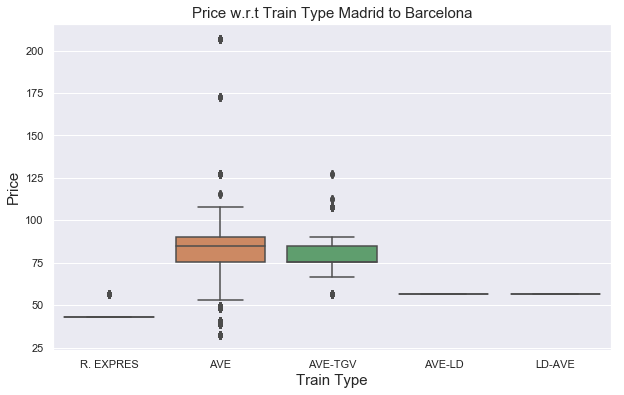

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='train_type', y='price', data=df1)
plt.title('Price w.r.t Train Type Madrid to Barcelona', fontsize=15)
plt.xlabel('Train Type', fontsize=15)
plt.ylabel('Price', fontsize=15)

plt.show()

## Travelling from MADRID to VALENCIA

In [40]:
df1 = df1 = df[df['from_to'] == 'madrid to val']

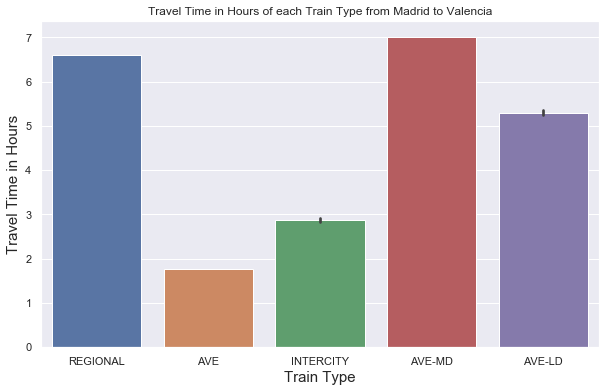

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='train_type', y='travel_time_in_hrs', data=df1)
plt.title('Travel Time in Hours of each Train Type from Madrid to Valencia')
plt.xlabel('Train Type', fontsize=15)
plt.ylabel('Travel Time in Hours', fontsize=15)

plt.show()

**train_type vs price**

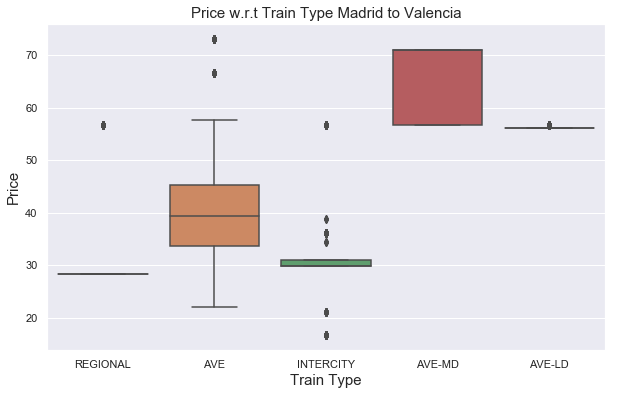

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='train_type', y='price', data=df1)
plt.title('Price w.r.t Train Type Madrid to Valencia', fontsize=15)
plt.xlabel('Train Type', fontsize=15)
plt.ylabel('Price', fontsize=15)

plt.show()

**Insights:** Well, looking at the plot above, AVE-MD type in Madrid to Valencia route costs the most.

## Travelling from MADRID to PONFERRADA

In [44]:
df1 = df[df['from_to'] == 'madrid to ponf']

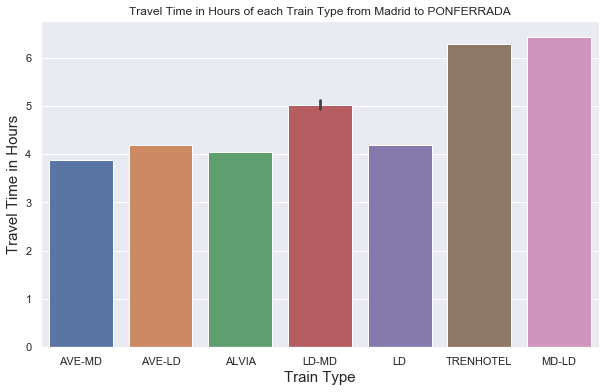

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x='train_type', y='travel_time_in_hrs', data=df1)
plt.title('Travel Time in Hours of each Train Type from Madrid to PONFERRADA')
plt.xlabel('Train Type', fontsize=15)
plt.ylabel('Travel Time in Hours', fontsize=15)

plt.show()

**train_type vs price**

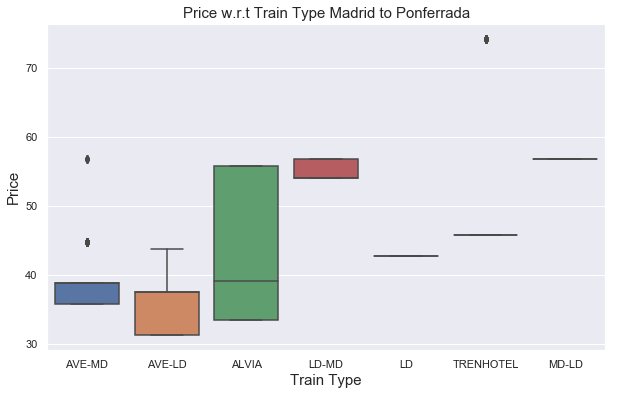

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='train_type', y='price', data=df1)
plt.title('Price w.r.t Train Type Madrid to Ponferrada', fontsize=15)
plt.xlabel('Train Type', fontsize=15)
plt.ylabel('Price', fontsize=15)

plt.show()

# Modelling

First, label encoding all the values.

In [47]:
from sklearn.preprocessing import LabelEncoder

**Data Encoding**

In [48]:
lab_en = LabelEncoder()

df.iloc[:,0] = lab_en.fit_transform(df.iloc[:,0])
df.iloc[:,2] = lab_en.fit_transform(df.iloc[:,2])
df.iloc[:,3] = lab_en.fit_transform(df.iloc[:,3])
df.iloc[:,4] = lab_en.fit_transform(df.iloc[:,4])
df.iloc[:,5] = lab_en.fit_transform(df.iloc[:,5])

In [49]:
df.head()

,train_type,price,train_class,fare,travel_time_in_hrs,from_to
0,11,59.50,4,1,47,5
1,11,34.65,4,4,53,5
2,12,39.95,4,4,54,5
3,11,40.60,4,4,48,5
4,0,27.90,2,3,44,5


Separate the dependant and independant variables.

In [50]:
X = df.drop(['price'], axis=1)
Y = df[['price']]

print(X.shape)
print(Y.shape)

(215266, 5)
(215266, 1)


Splitting the data into training and testing.

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=25, test_size=0.30, shuffle=True)

## Applying Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
lr = LinearRegression()

In [55]:
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
lr_predict = lr.predict(X_test)

Prediction on Training set.

In [57]:
lr_predict_train = lr.predict(X_train)

The metric I am going to use is R-Squared.

In [58]:
from sklearn.metrics import r2_score

R-Squared on Testing Set.

In [59]:
lr_r2_test = r2_score(y_true=Y_test, y_pred=lr_predict)

R-Squared on training Set.

In [60]:
lr_r2_train = r2_score(Y_train, lr_predict_train)

Comaparing training and testing R2 scores

In [61]:
print('R2 score for Linear Regression Training Data is: ', lr_r2_train)
print('R2 score for Linear Regression Testing Data is:  ', lr_r2_test)

R2 score for Linear Regression Training Data is:  0.6356267926032229
R2 score for Linear Regression Testing Data is:   0.6406115150488784


Let's find out the residual plot to see if any pattern exists or not.

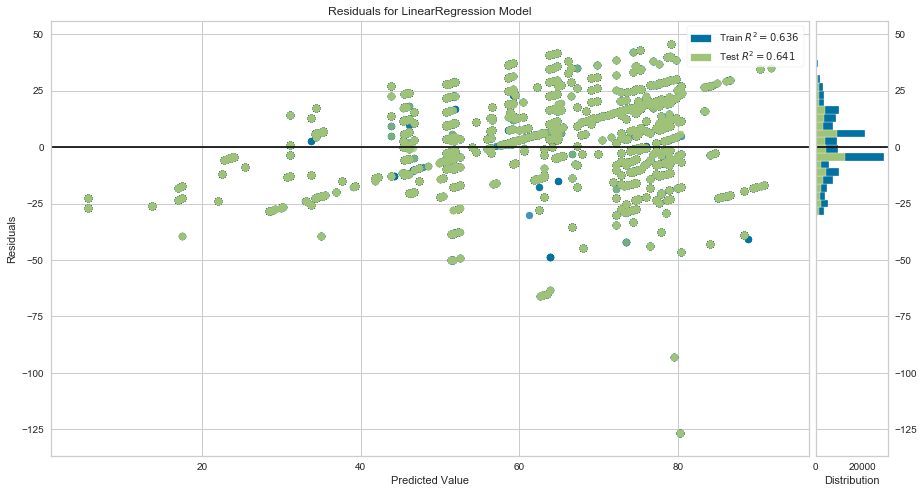

In [62]:
from yellowbrick.regressor import ResidualsPlot

plt.figure(figsize=(15, 8))
visualizer = ResidualsPlot(model=lr)
visualizer.fit(X_train.values, Y_train.values)
visualizer.score(X_test.values, Y_test.values)
visualizer.poof()

There seems to be a pattern in the Residual Plot. Linear Regression is not the right fit here. Let's move towards Polynomial Regression.

## Applying Polynomial Regression

In [63]:
from sklearn.preprocessing import PolynomialFeatures

Transforming the features using the default hyper-parameters.

In [64]:
poly_reg = PolynomialFeatures()

In [65]:
X_train_poly, X_test_poly = poly_reg.fit_transform(X_train), poly_reg.fit_transform(X_test)

In [66]:
poly_model = LinearRegression()

In [67]:
poly_model.fit(X_train_poly, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [68]:
y_train_predicted, y_test_predict = poly_model.predict(X_train_poly), poly_model.predict(X_test_poly)

In [69]:
# evaluating the model on training dataset
r2_train = r2_score(Y_train, y_train_predicted)

In [70]:
# evaluating the model on test dataset
r2_test = r2_score(Y_test, y_test_predict)

Comparing training and testing R2 scores

In [71]:
print('The r2 score for training set is: ', r2_train)
print('The r2 score for testing set is:  ', r2_test)

The r2 score for training set is:  0.7632064638428258
The r2 score for testing set is:   0.7642080262539725


### Model Complexity

In [72]:
from sklearn.metrics import mean_squared_error
mse_train = []
mse_test = []
r2_train = []
r2_test = []
for i in range(1, 6):
    poly_reg = PolynomialFeatures(degree=i)

    X_tr_poly, X_tst_poly = poly_reg.fit_transform(X_train), poly_reg.fit_transform(X_test)

    poly = LinearRegression()
    poly.fit(X_tr_poly, Y_train)

    y_tr_predicted, y_tst_predict = poly.predict(X_tr_poly), poly.predict(X_tst_poly)

    r2_train.append(r2_score(Y_train, y_tr_predicted))
    r2_test.append(r2_score(Y_test, y_tst_predict))

    mse_train.append(mean_squared_error(Y_train, y_tr_predicted))
    mse_test.append(mean_squared_error(Y_test, y_tst_predict))

In [73]:
print(' (R2 Train)', '              (R2 Test)')
print(' ----------               ---------')
list(zip(r2_train, r2_test))

 (R2 Train)               (R2 Test)
 ----------               ---------


[(0.6356267926032227, 0.6406115150488785),
 (0.7632064638428258, 0.7642080262539725),
 (0.8199874294120906, 0.8198578633901865),
 (0.8585771000531583, 0.8593590520589443),
 (0.8649611336416078, -99.53148593153391)]

#### Plotting the model complexity

(-2, 2)

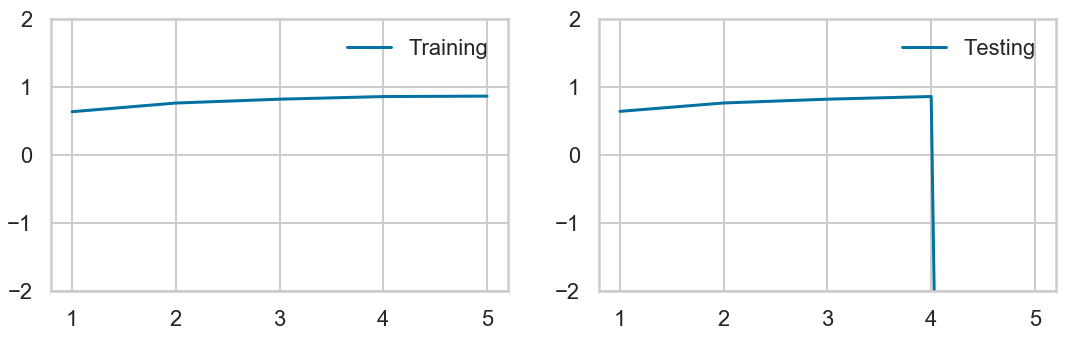

In [74]:
plt.figure(figsize=(18,5))

sns.set_context('poster')
plt.subplot(1,2,1)
sns.lineplot(x=list(range(1,6)), y=r2_train, label='Training')
plt.ylim(-2, 2)

plt.subplot(1,2,2)
sns.lineplot(x=list(range(1,6)), y=r2_test, label='Testing')
plt.ylim(-2, 2)

(0, 1)

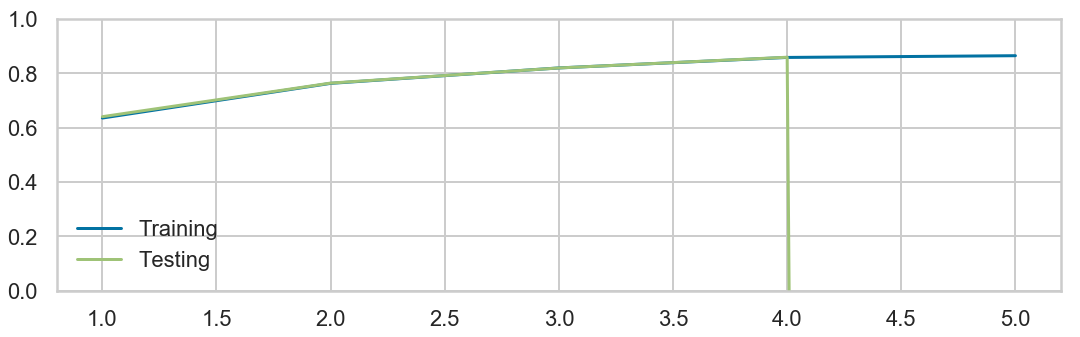

In [75]:
plt.figure(figsize=(18,5))

sns.set_context('poster')
sns.lineplot(x=list(range(1,6)), y=r2_train, label='Training')
sns.lineplot(x=list(range(1,6)), y=r2_test, label='Testing')
plt.ylim(0, 1)

In [76]:
list(zip(r2_train, r2_test))

[(0.6356267926032227, 0.6406115150488785),
 (0.7632064638428258, 0.7642080262539725),
 (0.8199874294120906, 0.8198578633901865),
 (0.8585771000531583, 0.8593590520589443),
 (0.8649611336416078, -99.53148593153391)]

Let's compare the Mean Squared Error

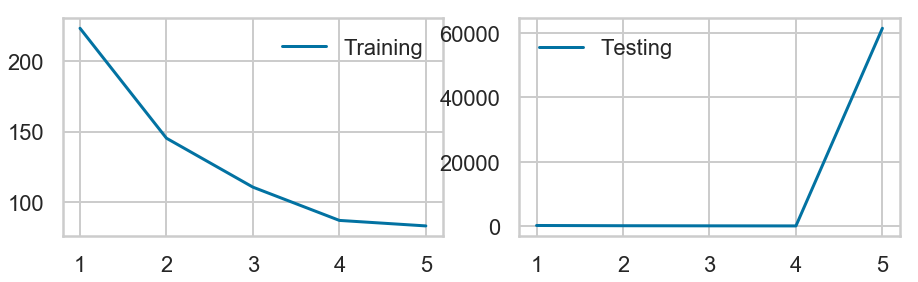

In [77]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.lineplot(x=list(range(1,6)), y=mse_train, label='Training')
plt.subplot(1,2,2)
sns.lineplot(x=list(range(1,6)), y=mse_test, label='Testing')
plt.show();

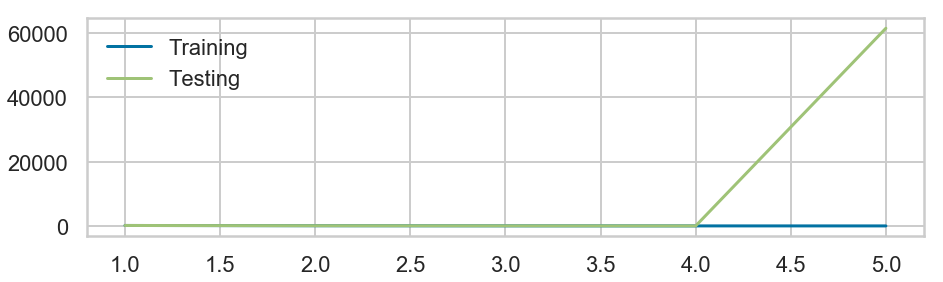

In [78]:
plt.figure(figsize=(15,4))
sns.lineplot(x=list(range(1,6)), y=mse_train, label='Training')
sns.lineplot(x=list(range(1,6)), y=mse_test, label='Testing')

In [79]:
list(zip(mse_train, mse_test))

[(223.50049192975965, 219.58360850366572),
 (145.24523412415934, 144.06708789903516),
 (110.4167300537207, 110.06546413339586),
 (86.74646507099865, 85.93054075306102),
 (82.83060457810346, 61423.96702577721)]

Based on both the Mean Squared Error and R2 Score of both training and testing data. We can say that degree 4 might be the right one. Let's train the data on degree 4.

Training the data on polynomial degree 4.

In [80]:
model_poly4 = PolynomialFeatures(degree=4)

poly_xtrain, poly_xtest = model_poly4.fit_transform(X_train), model_poly4.fit_transform(X_test)

model_on_poly4 = LinearRegression()
model_on_poly4.fit(poly_xtrain, Y_train)

poly_predicted_ytrain = model_on_poly4.predict(poly_xtrain)
poly_predicted_ytest = model_on_poly4.predict(poly_xtest)

Let's print the R2 score on both training and testing set.

In [81]:
print('Train R2 Score:', r2_score(Y_train, poly_predicted_ytrain))
print('Test R2 Score: ', r2_score(Y_test, poly_predicted_ytest))

Train R2 Score: 0.8585771000531583
Test R2 Score:  0.8593590520589443


Let's find the adjusted R2 Score.

In [82]:
def adjusted_r_score(X, Y, r2):
    n = len(Y)
    p = X.shape[1]
    adj_r = 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

    return adj_r

In [83]:
r2_poly4_train = r2_score(Y_train, poly_predicted_ytrain)
r2_poly4_test = r2_score(Y_test, poly_predicted_ytest)

adjusted_r2_training = adjusted_r_score(poly_xtrain, Y_train, r2_poly4_train)
adjusted_r2_testing = adjusted_r_score(poly_xtest, Y_test, r2_poly4_test)

In [84]:
print('Adjusted R2 for Training:', adjusted_r2_training)
print('Adjusted R2 for Testing: ', adjusted_r2_testing)

Adjusted R2 for Training: 0.858458745883741
Adjusted R2 for Testing:  0.8590841112580416


Now, let's compare R2 Score with and Adjusted R2 Score for training and testing set separately.

In [85]:
print('Training')
print([r2_poly4_train, adjusted_r2_training])

print(' ======================================')
print(' ======================================')

print('Testing')
print([r2_poly4_test, adjusted_r2_testing])

Training
[0.8585771000531583, 0.858458745883741]
Testing
[0.8593590520589443, 0.8590841112580416]


Interestingly, there is not much delta between R2 Score and Ajusted R2 Score.

## Applying KNN

In [86]:
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=15)

In [87]:
model_knn.fit(X_train, Y_train)
knn_pred = model_knn.predict(X_test)

Finding the R2 Score

In [88]:
knn_r2 = r2_score(Y_test, knn_pred)
knn_r2

0.876164486863561

We took 15 neighbors. Let's check the model complexity on the number of neighbors.

In [89]:
knn_r2_lst = []
n_neighbors = []

for i in range(1, 31):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, Y_train)
    knn_pred = knn.predict(X_test)
    knn_r2 = r2_score(Y_test, knn_pred)
    
    knn_r2_lst.append(knn_r2)
    n_neighbors.append(i)

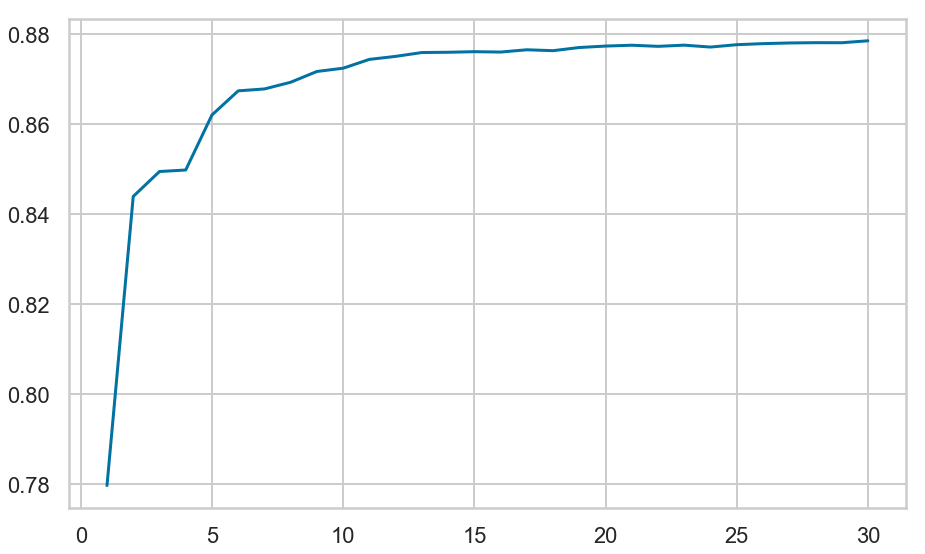

In [90]:
plt.figure(figsize=(15, 9))
sns.lineplot(x=n_neighbors, y=knn_r2_lst)

Choosing 30 neighbors. And checking on training data to see if there is any overfit or not.

In [91]:
knn = KNeighborsRegressor(n_neighbors=30)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(X_test)
knn_r2_test = r2_score(Y_test, knn_pred)

knn_pred_tr = knn.predict(X_train)
knn_r2_train = r2_score(Y_train, knn_pred_tr)

knn_r2_train, knn_r2_test

(0.8786849488621858, 0.8785848819217152)

There is no overfit.

Let's try KNN on 4th polynomial.

In [92]:
knn_poly4 = KNeighborsRegressor(30)
knn_poly4.fit(poly_xtrain, Y_train)
knn_pred_poly4_test = knn_poly4.predict(poly_xtest)
knn_pred_poly4_train = knn_poly4.predict(poly_xtrain)

knn_r2_train_poly4 = r2_score(Y_train, knn_pred_poly4_train)
knn_r2_test_poly4 = r2_score(Y_test, knn_pred_poly4_test)

In [93]:
knn_r2_train_poly4, knn_r2_test_poly4

(0.8762371476753524, 0.8747167596595368)

By using polynomial, our R2 decreased.

## Applying Decision Trees

In [94]:
from sklearn.tree import DecisionTreeRegressor

In [95]:
model_dt = DecisionTreeRegressor(max_depth=20, criterion='mse', random_state=25)

In [96]:
model_dt.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=25, splitter='best')

In [97]:
dt_pred_train = model_dt.predict(X_train)
dt_pred_test = model_dt.predict(X_test)

dt_r2_train = r2_score(Y_train, dt_pred_train)
dt_r2_test = r2_score(Y_test, dt_pred_test)

dt_r2_train, dt_r2_test

(0.8821301909359944, 0.8821424405571373)

Let's check on polynomial 4th degree.

In [98]:
model_dt_poly4 = DecisionTreeRegressor(max_depth=15, criterion='mse', random_state=25)

In [99]:
model_dt_poly4.fit(poly_xtrain, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=25, splitter='best')

In [100]:
dt_pred_train_poly4 = model_dt_poly4.predict(poly_xtrain)
dt_pred_test_poly4 = model_dt_poly4.predict(poly_xtest)

dt_r2_train_poly4 = r2_score(Y_train, dt_pred_train_poly4)
dt_r2_test_poly4 = r2_score(Y_test, dt_pred_test_poly4)

dt_r2_train_poly4, dt_r2_test_poly4

(0.8821301861402725, 0.8821343981843415)

On polynomial, there is no such difference.

## Applying Random Forest

In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
model_rf = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=25)

In [103]:
model_rf.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=25, verbose=0, warm_start=False)

In [104]:
rf_pred_train = model_rf.predict(X_train)
rf_pred_test = model_rf.predict(X_test)

rf_r2_train = r2_score(Y_train, rf_pred_train)
rf_r2_test = r2_score(Y_test, rf_pred_test)

rf_r2_train, rf_r2_test

(0.8821273163289799, 0.8821489358956861)

## Applying Ada Boost

In [105]:
from sklearn.ensemble import AdaBoostRegressor

In [106]:
model_ab = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=20, criterion='mse', random_state=25), random_state=25)

In [107]:
model_ab.fit(X_train, Y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=25, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=50,
         random_state=25)

In [108]:
ab_pred_train = model_ab.predict(X_train)
ab_pred_test = model_ab.predict(X_test)

ab_r2_train = r2_score(Y_train, ab_pred_train)
ab_r2_test = r2_score(Y_test, ab_pred_test)

ab_r2_train, ab_r2_test

(0.87390851232742, 0.8746281239162635)

## Applying XGBoost

In [109]:
import xgboost as xgb

In [110]:
model_xgb = xgb.XGBRegressor(max_depth=20, seed=25, random_state=25)

In [111]:
model_xgb.fit(X_train, Y_train)

[21:39:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=20, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=25,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=25, silent=None,
       subsample=1, verbosity=1)

In [112]:
xgb_pred_train = model_xgb.predict(X_train)
xgb_pred_test = model_xgb.predict(X_test)

In [113]:
xgb_r2_train = r2_score(Y_train, xgb_pred_train)
xgb_r2_test = r2_score(Y_test, xgb_pred_test)

xgb_r2_train, xgb_r2_test

(0.8821301841996712, 0.8821420678389017)

In [114]:
r2_dict = {
    'Linear': [lr_r2_train, lr_r2_test],
    'Polynomial (4th)': [r2_score(Y_train, poly_predicted_ytrain), r2_score(Y_test, poly_predicted_ytest)],
    'K-Nearest Neighbors': [knn_r2_train, knn_r2_test],
    'Decision Trees': [dt_r2_train, dt_r2_test],
    'Random Forest': [rf_r2_train, rf_r2_test],
    'Ada Boost': [ab_r2_train, ab_r2_test],
    'XGBoost': [xgb_r2_train, xgb_r2_test]
}

In [115]:
scores = pd.DataFrame(data=r2_dict, index=['R2 Train', 'R2 Test'])
scores

,Linear,Polynomial (4th),K-Nearest Neighbors,Decision Trees,Random Forest,Ada Boost,XGBoost
R2 Train,0.635627,0.858577,0.878685,0.882130,0.882127,0.873909,0.882130
R2 Test,0.640612,0.859359,0.878585,0.882142,0.882149,0.874628,0.882142


**Conclusion:** Looking at the above table, KNN, Decision Trees, Random Forest, and XGBoost happen to perform quite well and their R-Squared Coefficient is quite similar. However, looking at the decimal values, we may choose Random Forest.

# Possible Improvements

We can improve the score more by using **Hyper-parameter tuning** using **RandomizedSearchCV** and then compare the results to choose more well suited model.